In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

df = pd.read_csv("beer.tsv", delimiter=" ")
df['id'].astype('int')
df['ame'].astype('string')
df['calories'].astype('int')
df['sodium'].astype('int')
df['alcohol_min'].astype('float')
df['alcohol_max'].astype('float')
df['cost'].astype('float')
df["avg_alcohol"] = (df["alcohol_min"] + df["alcohol_min"]) / 2

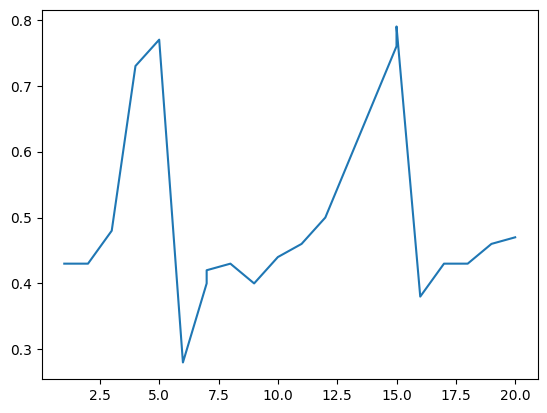

In [8]:
# 1.1
plt.plot(df['id'], df['cost'])
plt.show()

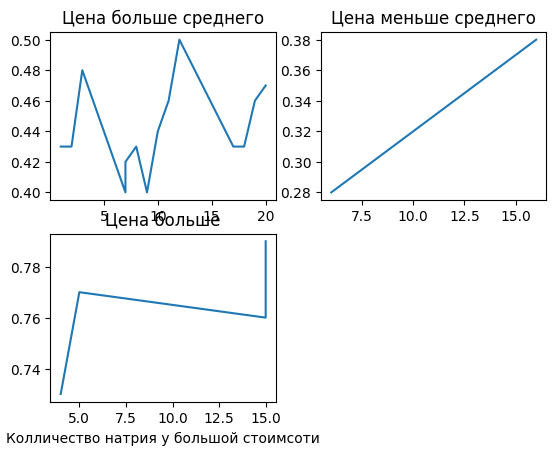

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax1.title.set_text('Цена больше среднего')
ax2.title.set_text('Цена меньше среднего')
ax3.title.set_text('Цена больше')
ax3.xaxis.set_label_text('Колличество натрия у большой стоимсоти')
plt.subplot(221)
sr = df.loc[(df['cost'] >= 0.4) & (df['cost'] <= 0.7)]
plt.plot(sr['id'], sr['cost'])
plt.subplot(222)
small = df.loc[df['cost'] < 0.4]
plt.plot(small['id'], small['cost'])
plt.subplot(223)
max = df.loc[df['cost'] > 0.7]
plt.plot(max['id'], max['cost'])

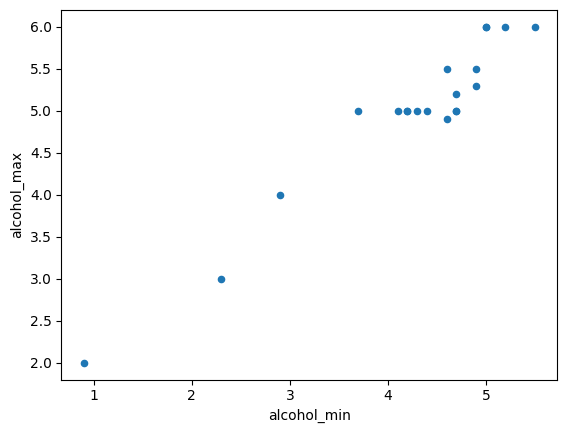

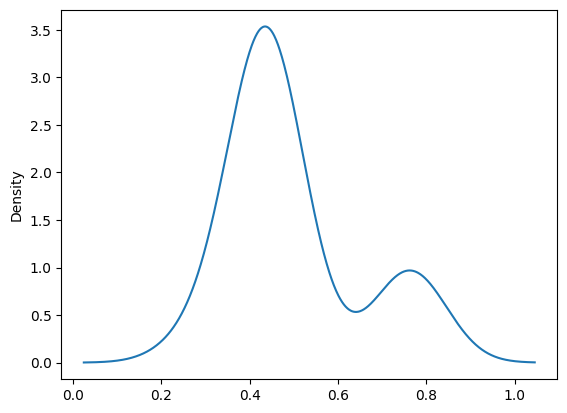

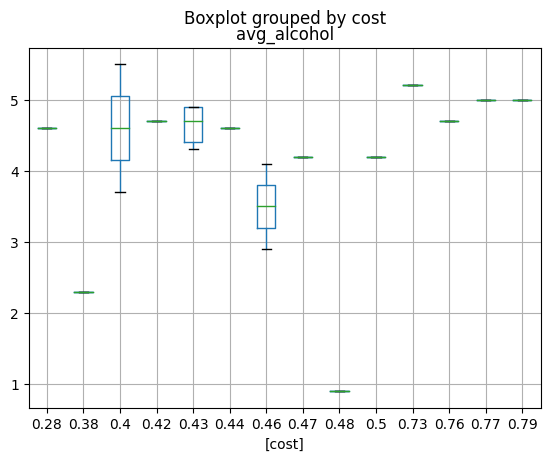

In [16]:
df.plot(x="alcohol_min", y="alcohol_max", kind='scatter')
plt.show()

df["cost"].plot(kind='kde')
plt.show()

df.boxplot(column=["avg_alcohol"], by=["cost"])
plt.show()

In [18]:
test=df["ame"].value_counts().head(15).reset_index()
fig = px.pie(test, names="index",values="ame")
fig.show()

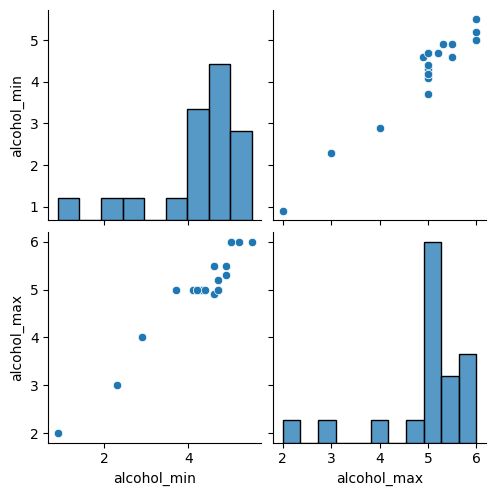

In [21]:
sns.pairplot(data=df, vars=["alcohol_min", "alcohol_max"])
plt.show()

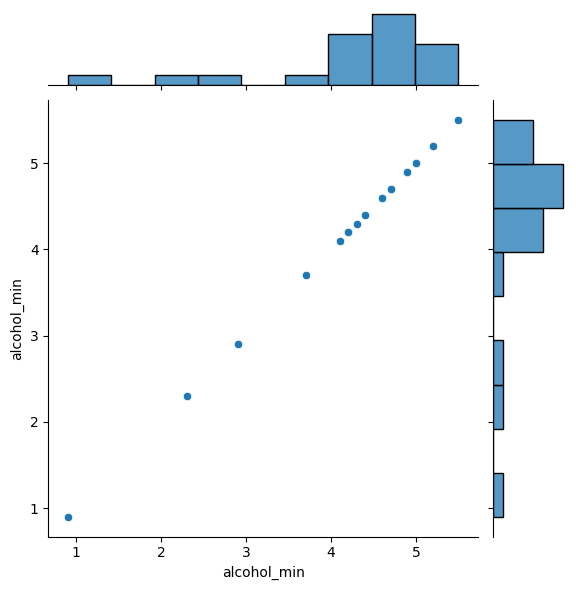

In [22]:
sns.jointplot(data=df, x="alcohol_min", y="alcohol_min")
plt.show()

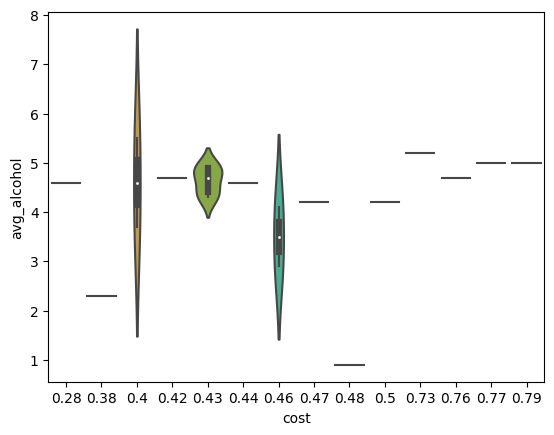

In [23]:
sns.violinplot(data=df, x="cost", y="avg_alcohol")
plt.show()

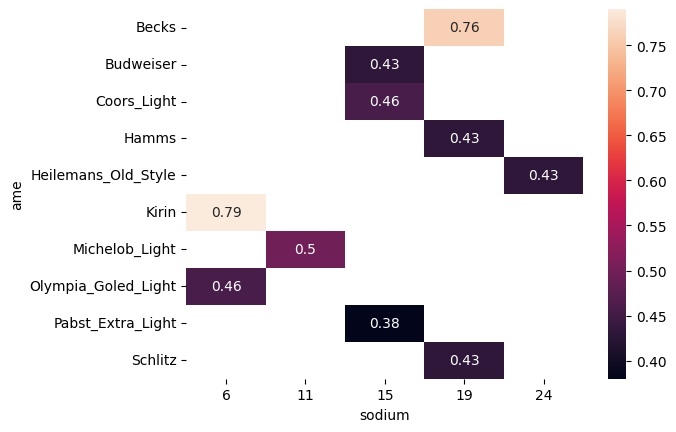

In [29]:
test = df["ame"].value_counts().head(10).index
df1 = df[df["ame"].isin(test)][["ame", "sodium", "cost"]]

sns.heatmap(df1.pivot_table(index="ame", columns="sodium", values="cost", aggfunc=np.mean), annot=True)
plt.show()